In [70]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime

# Download necessary NLTK data if not already downloaded
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mudas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mudas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mudas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\mudas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [71]:
file_path = r"C:\Users\mudas\OneDrive\Desktop\BAIS\Text Analytics\assignments\BookingDotCom_HotelReviews.xlsx"
# Read the Excel file
df = pd.read_excel(file_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Hotel_Name                515738 non-null  object        
 1   Hotel_Address             515738 non-null  object        
 2   Review_Count              515738 non-null  int64         
 3   Non_Review_Scoring_Count  515738 non-null  int64         
 4   Average_Hotel_Score       515738 non-null  float64       
 5   Review_Date               515738 non-null  datetime64[ns]
 6   Reviewer_Nationality      515738 non-null  object        
 7   Positive_Comments         515738 non-null  object        
 8   Negative_Comments         515738 non-null  object        
 9   Total_Reviewer_Reviews    515738 non-null  int64         
 10  Reviewer_Score            515738 non-null  float64       
 11  Tags                      515738 non-null  object        
dtypes:

In [73]:
df.describe()


,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Total_Reviewer_Reviews,Reviewer_Score
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,2743.743944,498.081836,8.397487,7.166001,8.395077
std,2317.464868,500.538467,0.548048,11.040228,1.637856
min,43.000000,1.000000,5.200000,1.000000,2.500000
25%,1161.000000,169.000000,8.100000,1.000000,7.500000
50%,2134.000000,341.000000,8.400000,3.000000,8.800000
75%,3613.000000,660.000000,8.800000,8.000000,9.600000
max,16670.000000,2682.000000,9.800000,355.000000,10.000000


In [ ]:
df.Positive_Comments.value_counts().head(30) #check the value counts of positive comments

Positive_Comments
No Positive            35946
 Location               9222
 Everything             2284
 location               1677
 Nothing                1243
 The location           1126
 Great location         1047
 Good location           927
 Location                915
 Everything              613
 Breakfast               608
 Friendly staff          515
 Staff                   453
 Excellent location      392
 Great location          372
 Location and staff      333
 everything              319
 Good location           276
 Nothing                 225
 Comfy bed               222
 nothing                 217
 The location            215
 good location           206
 The staff               197
 Good breakfast          189
                         183
 the location            180
 Location staff          180
 Location was good       178
 Location was great      178
Name: count, dtype: int64

In [ ]:
df.Negative_Comments.value_counts().head(30) #check the value counts of negative comments

Negative_Comments
No Negative            127890
 Nothing                14295
 Nothing                 4236
 nothing                 2225
 N A                     1037
 None                     984
                          849
 N a                      509
 Breakfast                407
 Small room               373
 Location                 368
 Everything               326
 All good                 318
 Nothing really           316
 none                     302
 nothing                  283
 No complaints            274
 Price                    260
 Nothing really           254
 Nil                      247
 n a                      227
 Nothing at all           221
 Nothing to dislike       209
 Nothing at all           194
 Small rooms              188
 None                     182
 No complaints            176
 All good                 152
 NA                       148
 Expensive                142
Name: count, dtype: int64

## Question 1

## Top 5 features mentioned in positive vs negative reviews

In [175]:

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#function to process the comments
def process_comments(text):
    if not isinstance(text, str):
        return text
        
    # List of specific words to remove that we saw in the value counts
    specific_words_to_remove = {'nothing', 'na', 'n a', 'nil', 'none', 'no'} 

    # Remove special characters and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text)
    
    # Get POS tags
    tagged_tokens = pos_tag(tokens)
    

    # Filter out adjectives, stopwords, specific words, and short words
    filtered_words = [
        word for word, tag in tagged_tokens 
        if (not tag.startswith('JJ') and 
            word.lower() not in specific_words_to_remove and
            word.lower() not in stop_words and
            len(word) > 2)  # Remove words shorter than 3 characters
    ]
    # Lemmatize the remaining words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # Join the words back into a string
    processed_text = ' '.join(lemmatized_words)
    
    # Remove extra spaces
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()
    
    return processed_text


In [ ]:

# Apply the processing to negative comments
df_negative_processed = df.copy()
df_negative_processed['Negative_Comments_Processed'] = df['Negative_Comments'].apply(process_comments)

In [ ]:
# Display the original and processed negative comments side by side
negative_comparison_df = pd.DataFrame({
    'Original Negative Comment': df['Negative_Comments'],
    'Processed (common negative words removed)': df_negative_processed['Negative_Comments_Processed']
})

# Display the first 10 rows
negative_comparison_df.head(10)

,Original Negative Comment,Processed (common negative words removed)
0,I am so angry that i made this post available...,made post via site use planing trip one make m...
1,No Negative,
2,Rooms are nice but for elderly a bit difficul...,room elderly bit room two story step ask level...
3,My room was dirty and I was afraid to walk ba...,room walk barefoot floor looked cleaned week f...
4,You When I booked with your company on line y...,booked company line showed picture room though...
5,Backyard of the hotel is total mess shouldn t...,backyard hotel mess happen hotel star
6,Cleaner did not change our sheet and duvet ev...,cleaner change sheet duvet made bed also clean...
7,Apart from the price for the brekfast Everyth...,apart price brekfast everything
8,Even though the pictures show very clean room...,even though picture show room room dirty outli...
9,The aircondition makes so much noise and its ...,aircondition make noise sleep night


In [78]:
# Apply the processing to positive comments
df_positive_processed = df.copy()
df_positive_processed['Positive_Comments_Processed'] = df['Positive_Comments'].apply(process_comments)

In [ ]:
# Function to get most frequent words
def get_top_words(series, n=5):
    # Join all processed comments into one string
    all_words = ' '.join(str(x) for x in series.dropna())
    # Tokenize and count
    word_counts = Counter(word_tokenize(all_words))
    # Get top n words
    return word_counts.most_common(n)

# Get top 5 words from negative comments
print("\nTop 5 most frequent words in negative comments:")
top_negative = get_top_words(df_negative_processed['Negative_Comments_Processed'],5)
for word, count in top_negative:
    print(f"{word}: {count}")

# Get top 5 words from positive comments
print("\nTop 5 most frequent words in positive comments:")
top_positive = get_top_words(df_positive_processed['Positive_Comments_Processed'],5)
for word, count in top_positive:
    print(f"{word}: {count}")




Top 5 most frequent words in negative comments:
room: 210828
hotel: 80262
breakfast: 58832
staff: 39979
bed: 36702

Top 5 most frequent words in positive comments:
staff: 196632
location: 193365
room: 181116
hotel: 129886
breakfast: 85744


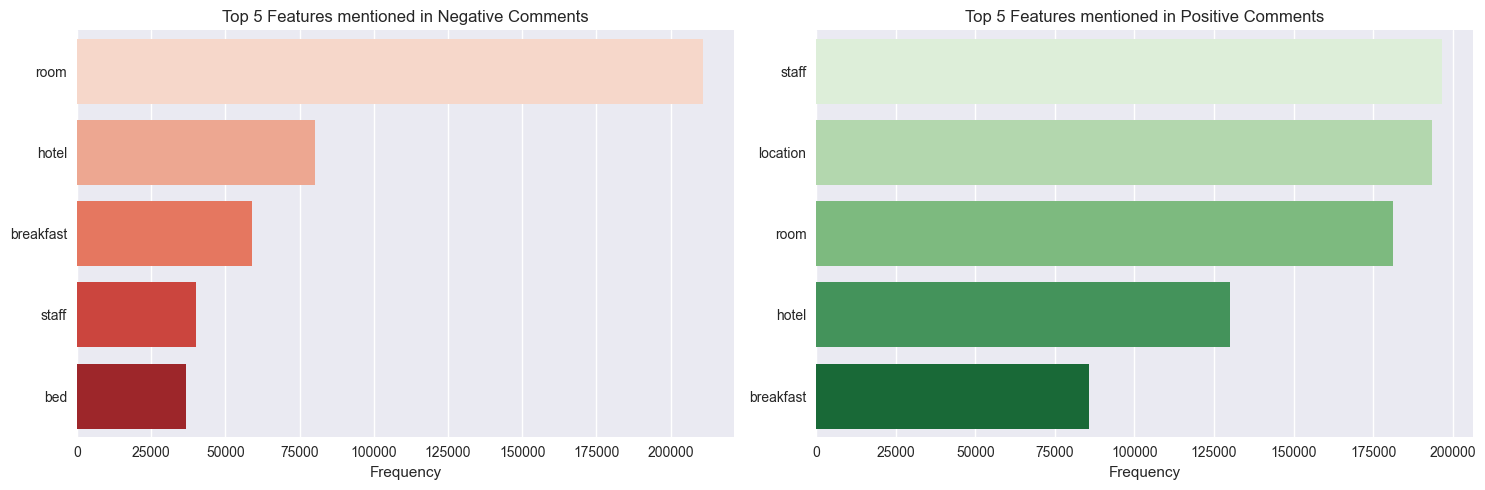

In [174]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot negative comments
words_neg, counts_neg = zip(*top_negative)
sns.barplot(x=list(counts_neg), y=list(words_neg),hue=list(words_neg),legend=False, ax=ax1, palette='Reds')
ax1.set_title('Top 5 Features mentioned in Negative Comments')
ax1.set_xlabel('Frequency')

# Plot positive comments
words_pos, counts_pos = zip(*top_positive)
sns.barplot(x=list(counts_pos), y=list(words_pos),hue=list(words_pos),legend=False, ax=ax2, palette='Greens')
ax2.set_title('Top 5 Features mentioned in Positive Comments')
ax2.set_xlabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [89]:
# Add the processed comments to the dataframe
df['Negative_Comments_Processed'] = df_negative_processed['Negative_Comments_Processed']
df['Positive_Comments_Processed'] = df_positive_processed['Positive_Comments_Processed']

# Display a few rows to see the changes
print("\nSample of processed comments:")
print(df[['Negative_Comments', 'Negative_Comments_Processed', 
          'Positive_Comments', 'Positive_Comments_Processed']].head(10))



Sample of processed comments:
                                   Negative_Comments  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   
5   Backyard of the hotel is total mess shouldn t...   
6   Cleaner did not change our sheet and duvet ev...   
7   Apart from the price for the brekfast Everyth...   
8   Even though the pictures show very clean room...   
9   The aircondition makes so much noise and its ...   

                         Negative_Comments_Processed  \
0  made post via site use planing trip one make m...   
1                                                      
2  room elderly bit room two story step ask level...   
3  room walk barefoot floor looked cleaned week f...   
4  booked company line showed picture room though...   
5              b

In [90]:
import pickle

# Create a dictionary to store all the data we want to save
data_to_save = {'df': df,
    'df_negative_processed': df_negative_processed,
    'df_positive_processed': df_positive_processed,
    'top_negative_words': top_negative,
    'top_positive_words': top_positive
}

# Save the data to a pickle file
with open('processed_reviews_data.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)


In [91]:

# To verify the save was successful, let's load it back
with open('processed_reviews_data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Print confirmation
print("Data successfully saved and loaded!")
print("\nKeys in saved data:", loaded_data.keys())

Data successfully saved and loaded!

Keys in saved data: dict_keys(['df', 'df_negative_processed', 'df_positive_processed', 'top_negative_words', 'top_positive_words'])


In [93]:
df.head(5)

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags,Negative_Comments_Processed,Positive_Comments_Processed
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,08-03-2017,Russia,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",made post via site use planing trip one make m...,park outside hotel
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,08-03-2017,Ireland,No real complaints the hotel was great great ...,No Negative,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",,complaint hotel location surroundings room ame...
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,07-31-2017,Australia,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,9,7.1,"[' Leisure trip ', ' Family with young childre...",room elderly bit room two story step ask level...,location staff hotel breakfast range back
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,07-31-2017,United Kingdom,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",room walk barefoot floor looked cleaned week f...,location surroundings bar restaurant area buil...
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,07-24-2017,New Zealand,Amazing location and building Romantic setting,You When I booked with your company on line y...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",booked company line showed picture room though...,amazing location building setting


## Question 2
## Top 5 positive features by tags

In [95]:
# First, let's see what the Tags column looks like
print("Sample of Tags column:")
print(df['Tags'].head(10))

Sample of Tags column:
0    [' Leisure trip ', ' Couple ', ' Duplex Double...
1    [' Leisure trip ', ' Couple ', ' Duplex Double...
2    [' Leisure trip ', ' Family with young childre...
3    [' Leisure trip ', ' Solo traveler ', ' Duplex...
4    [' Leisure trip ', ' Couple ', ' Suite ', ' St...
5    [' Leisure trip ', ' Group ', ' Duplex Double ...
6    [' Leisure trip ', ' Group ', ' Duplex Twin Ro...
7    [' Leisure trip ', ' Couple ', ' Duplex Double...
8    [' Leisure trip ', ' Couple ', ' Duplex Double...
9    [' Leisure trip ', ' Couple ', ' Large King Ro...
Name: Tags, dtype: object


In [179]:
# Function to get top words for a specific traveler category
def get_top_words_for_category(df, category, column='Positive_Comments_Processed', n=5):
    # Filter rows where the category is in the Tags
    category_mask = df['Tags'].str.contains(category, na=False) 
    category_df = df[category_mask]
    
    # Get all processed comments
    all_words = ' '.join(str(x) for x in category_df[column].dropna()) 
    word_counts = Counter(word_tokenize(all_words))
    return word_counts.most_common(n)



Top 5 Features for Solo traveler:
location: 39181
room: 37108
staff: 36780
hotel: 22844
breakfast: 15786

Top 5 Features for Group:
staff: 25223
location: 24130
room: 21543
hotel: 17065
breakfast: 10804

Top 5 Features for Business trip:
location: 28694
room: 25647
staff: 25433
hotel: 15864
breakfast: 12297

Top 5 Features for Leisure trip:
staff: 165956
location: 160355
room: 150784
hotel: 110908
breakfast: 71344

Top 5 Features for Couple:
staff: 99840
location: 93768
room: 92433
hotel: 67626
breakfast: 42960

Top 5 Features for Family with young children:
location: 23791
staff: 23130
room: 20243
hotel: 15206
breakfast: 11173


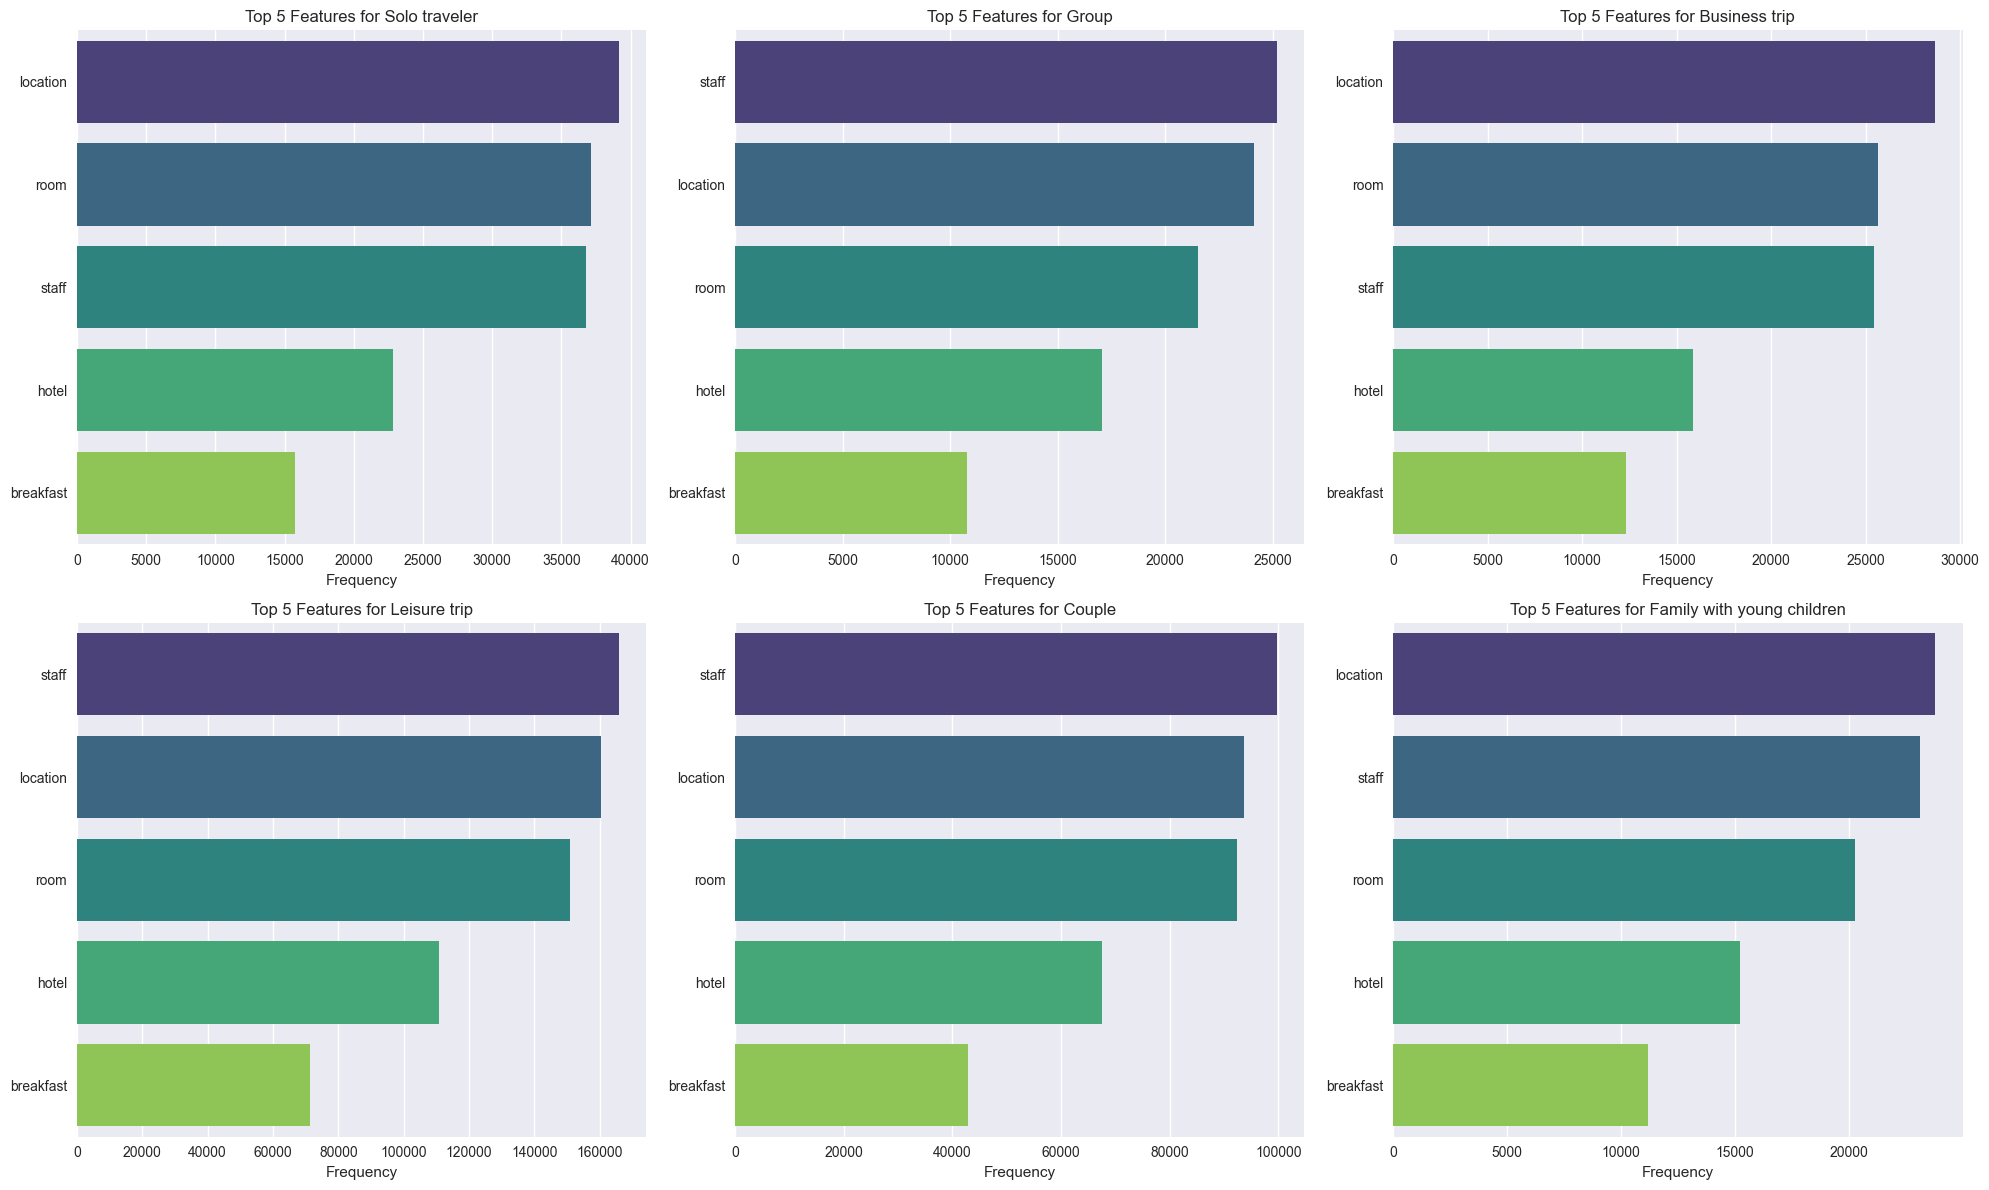

In [180]:

# Define traveler categories to be analysed
traveler_categories = [
    'Solo traveler',
    'Group',
    'Business trip',
    'Leisure trip',
    'Couple',
    'Family with young children'
]

# Create subplots for each category
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Analyze each category
for idx, category in enumerate(traveler_categories): #loop through the categories
    top_words = get_top_words_for_category(df, category) #get the top words for the category
    words, counts = zip(*top_words) #unzip the words and counts
    
    # Create barplot with updated parameters
    sns.barplot(x=list(counts), y=list(words), ax=axes[idx], 
                hue=list(words), legend=False, palette='viridis')
    axes[idx].set_title(f'Top 5 Features for {category}')
    axes[idx].set_xlabel('Frequency')
    
    # Print the results
    print(f"\nTop 5 Features for {category}:")
    for word, count in top_words:
        print(f"{word}: {count}")

plt.tight_layout()
plt.show()

## Question 3
## Top 5 and bottom 5 features by country

In [107]:
print(df['Hotel_Address'].head(10)) #check the hotel address format

0     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
1     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
2     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
3     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
4     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
5     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
6     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
7     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
8     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
9     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
Name: Hotel_Address, dtype: object


In [123]:
# Function to extract country from address
def extract_country(address):
    if not isinstance(address, str):
        return None
    
    # List of countries that might appear in the addresses
    countries = ['United Kingdom', 'Spain', 'France', 'Netherlands', 'Austria', 'Italy']
    
    # Check for each country in the address
    for country in countries:
        if country.lower() in address.lower():
            return country
    
    return None


In [122]:

# Add new column with extracted country
df['Country'] = df['Hotel_Address'].apply(extract_country)

# Display the results to verify
print("Sample of extracted countries:")
print(df[['Hotel_Address', 'Country']].head())

# Show unique countries and their counts
print("\nUnique countries and their counts:")
print(df['Country'].value_counts())

Sample of extracted countries:
                                       Hotel_Address      Country
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Netherlands
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Netherlands
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Netherlands
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Netherlands
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Netherlands

Unique countries and their counts:
Country
United Kingdom    262301
Spain              60149
France             59928
Netherlands        57213
Austria            38939
Italy              37207
Name: count, dtype: int64


In [124]:
# Function to get top words for a specific country
def get_top_words_for_country(df, country, column, n):
    # Filter rows for the specific country
    country_mask = df['Country'] == country
    country_df = df[country_mask]
    
    # Get all processed comments
    all_words = ' '.join(str(x) for x in country_df[column].dropna())
    word_counts = Counter(word_tokenize(all_words))
    return word_counts.most_common(n)


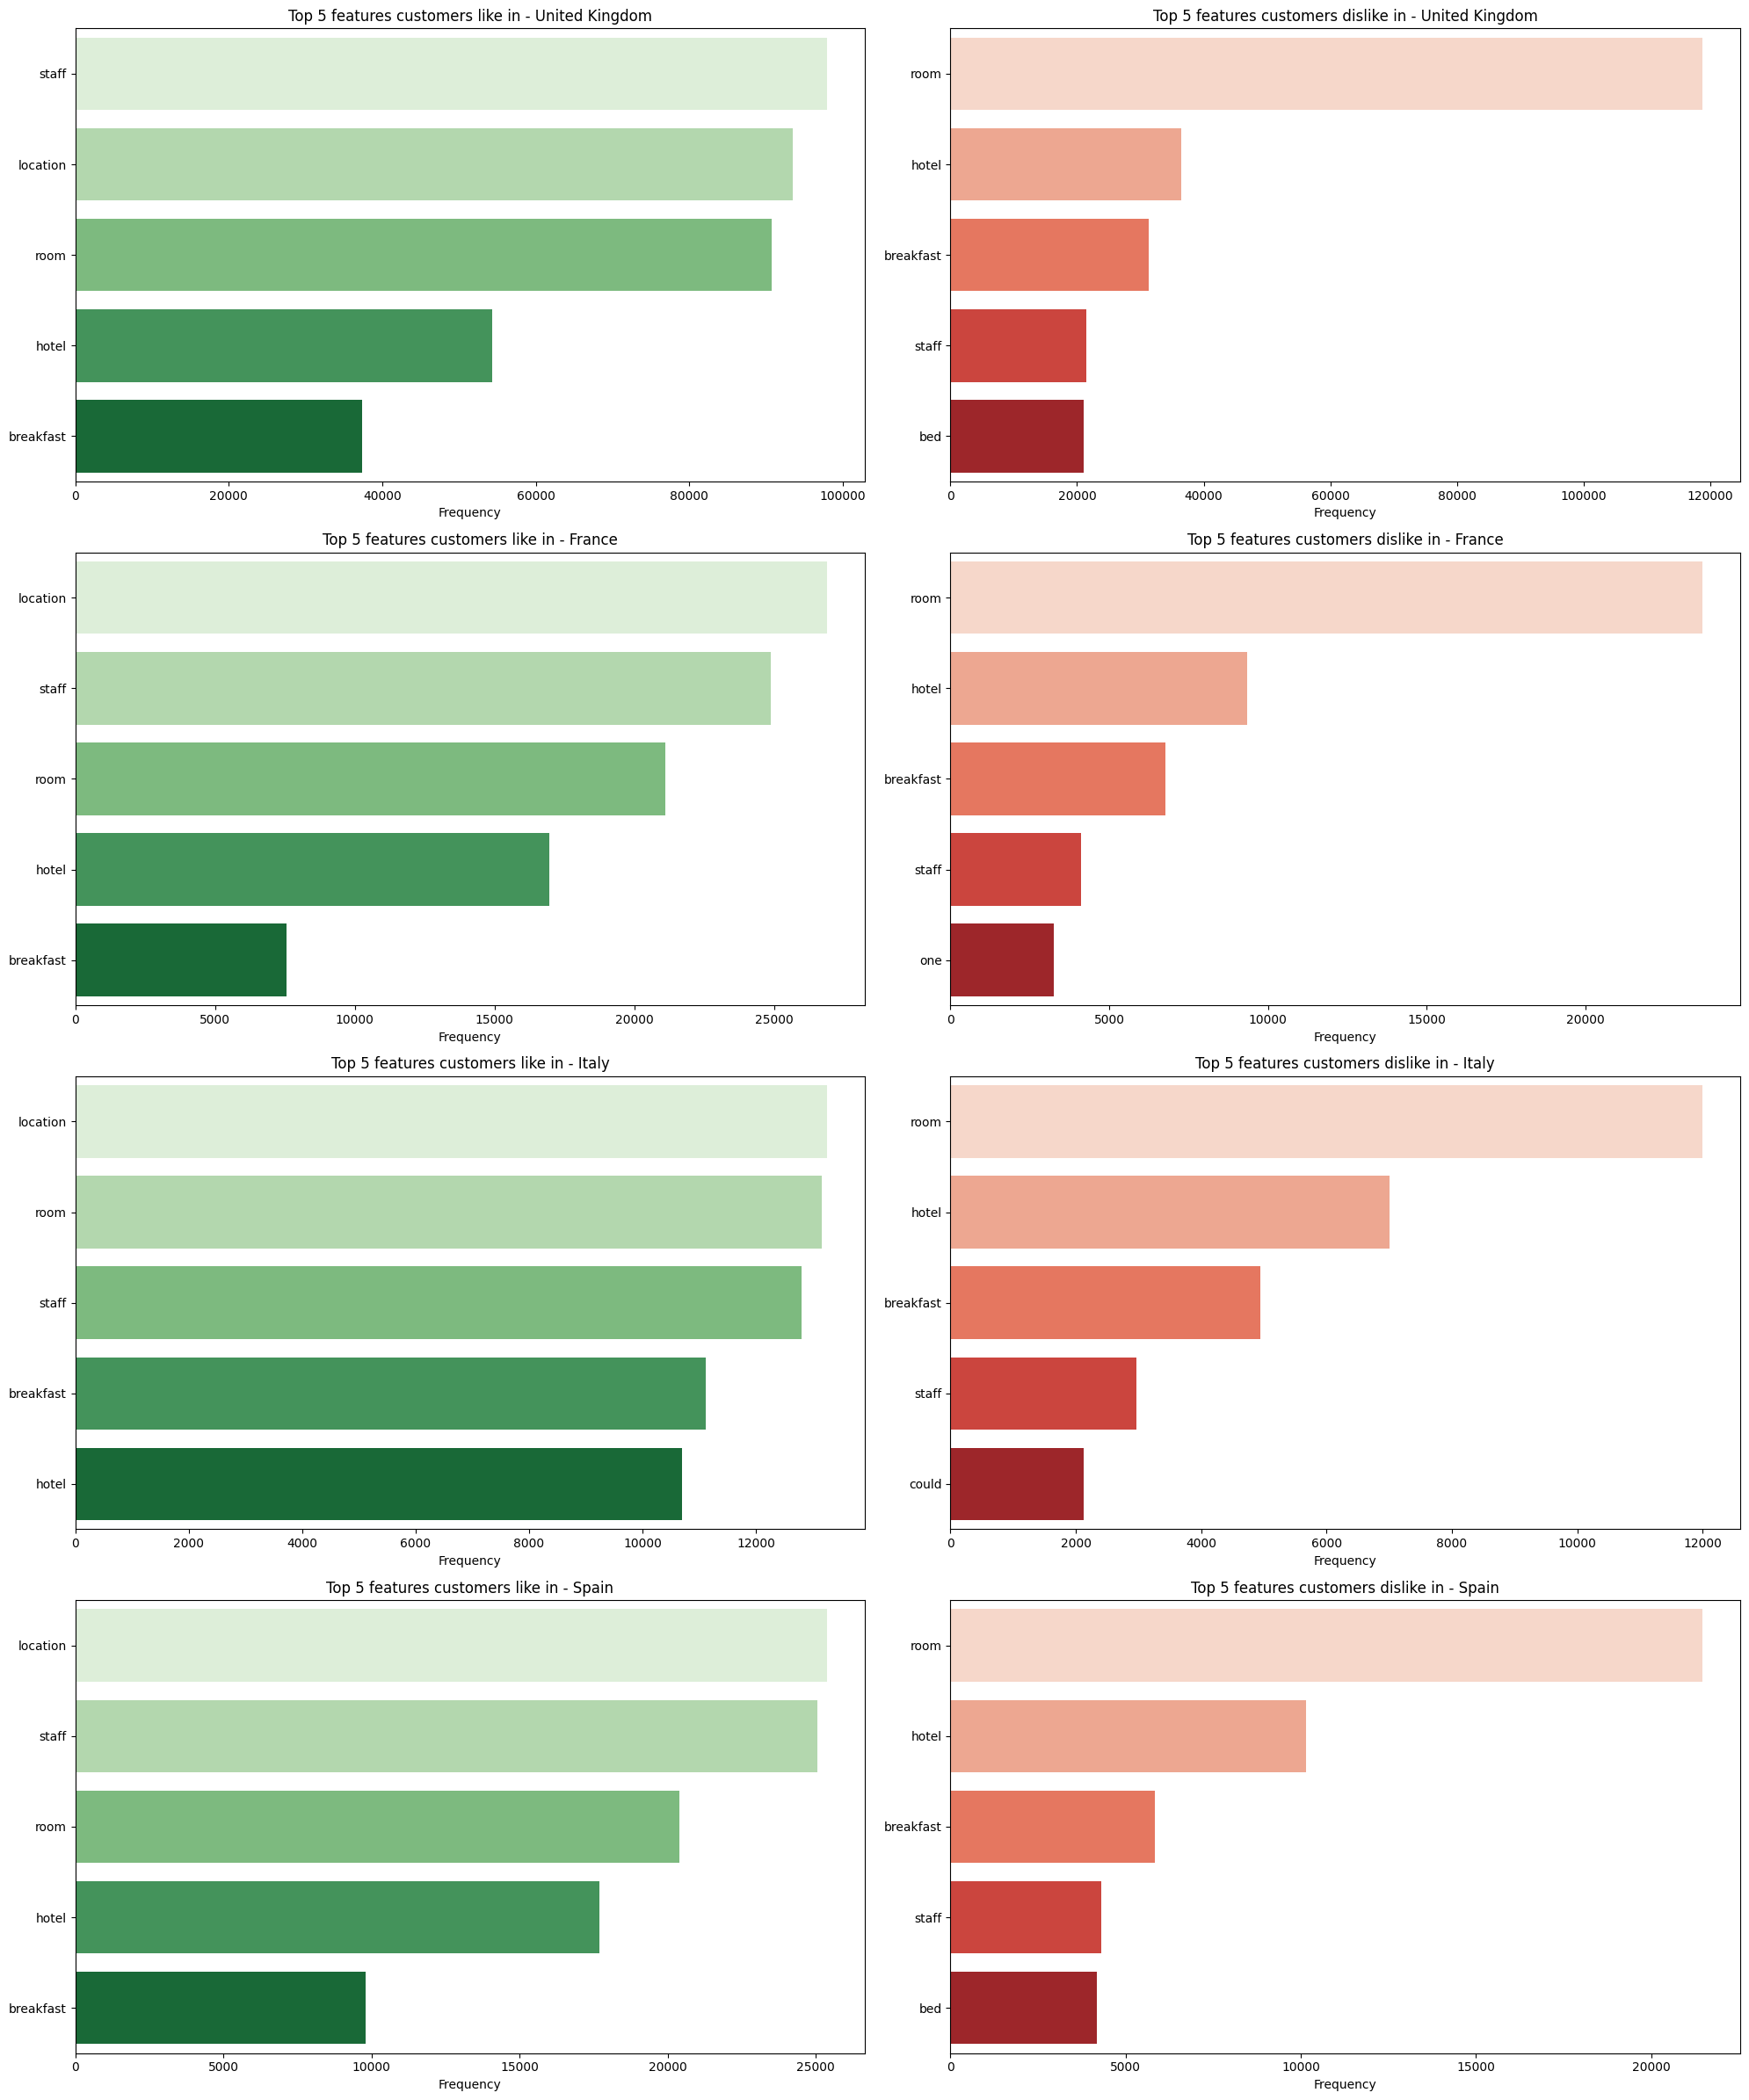

In [127]:
# List of countries to analyze
countries = ['United Kingdom', 'France', 'Italy', 'Spain']

# Create subplots for each country (2 plots per country: positive and negative)
fig, axes = plt.subplots(4, 2, figsize=(20, 24))

# Analyze each country
for idx, country in enumerate(countries):
    # Get top words for both positive and negative comments
    pos_words = get_top_words_for_country(df, country, 'Positive_Comments_Processed',5)
    neg_words = get_top_words_for_country(df, country, 'Negative_Comments_Processed',5)
    
    # Positive comments plot
    words_pos, counts_pos = zip(*pos_words)
    sns.barplot(x=list(counts_pos), y=list(words_pos), ax=axes[idx, 0], 
                hue=list(words_pos), legend=False, palette='Greens')
    axes[idx, 0].set_title(f'Top 5 features customers like in - {country}')
    axes[idx, 0].set_xlabel('Frequency')
    
    # Negative comments plot
    words_neg, counts_neg = zip(*neg_words)
    sns.barplot(x=list(counts_neg), y=list(words_neg), ax=axes[idx, 1], 
                hue=list(words_neg), legend=False, palette='Reds')
    axes[idx, 1].set_title(f'Top 5 features customers dislike in - {country}')
    axes[idx, 1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

## Question 4
## Dashboard: top 5, bottom 5, most improved hotels

In [130]:
# Convert Review_Date to datetime 
df['Review_Date'] = pd.to_datetime(df['Review_Date'])


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Hotel_Name                   515738 non-null  object        
 1   Hotel_Address                515738 non-null  object        
 2   Review_Count                 515738 non-null  int64         
 3   Non_Review_Scoring_Count     515738 non-null  int64         
 4   Average_Hotel_Score          515738 non-null  float64       
 5   Review_Date                  515738 non-null  datetime64[ns]
 6   Reviewer_Nationality         515738 non-null  object        
 7   Positive_Comments            515738 non-null  object        
 8   Negative_Comments            515738 non-null  object        
 9   Total_Reviewer_Reviews       515738 non-null  int64         
 10  Reviewer_Score               515738 non-null  float64       
 11  Tags                      

In [133]:
# Extract year from Review_Date
df['Year'] = df['Review_Date'].dt.year

In [152]:
# 1. Top Five Hotels Overall
def get_top_hotels(df, n=5):
    hotels = (df.groupby('Hotel_Name') 
             .agg({
                 'Reviewer_Score': ['mean', 'count'], #calculate the mean and count of the reviewer score
                 'Hotel_Address': 'first' #reference the first hotel address
             }))
    
    # Flatten column names
    hotels.columns = ['Average_Score', 'Review_Count', 'Hotel_Address'] #rename the columns
    hotels = hotels.reset_index()
    
    return (hotels
            .sort_values('Average_Score', ascending=False)
            .head(n))

In [142]:
# 2. Bottom Five Hotels
def get_bottom_hotels(df, n=5):
    hotels = (df.groupby('Hotel_Name')
             .agg({
                 'Reviewer_Score': ['mean', 'count'],
                 'Hotel_Address': 'first'
             }))
    
    # Flatten column names
    hotels.columns = ['Average_Score', 'Review_Count', 'Hotel_Address']
    hotels = hotels.reset_index()
    
    return (hotels
            .sort_values('Average_Score', ascending=True)
            .head(n))

In [164]:
# 3. Most Improved Hotels Plot
def get_most_improved_hotels(df, n=5):
    # Calculate yearly averages for each hotel
    yearly_avg = (df.groupby(['Hotel_Name', 'Year'])  #group by the hotel name and year
                 .agg({
                     'Reviewer_Score': 'mean', #calculate the mean of the reviewer score
                     'Hotel_Address': 'first' #reference the first hotel address
                 })
                 .reset_index())
    
    # Calculate improvement (2017 score - 2015 score)
    improvement = [] #create an empty list to store the improvement
    for hotel in yearly_avg['Hotel_Name'].unique(): #loop through the hotels
        hotel_data = yearly_avg[yearly_avg['Hotel_Name'] == hotel] #filter the dataframe for the hotel
        years_present = hotel_data['Year'].unique() #get the unique years
        if 2015 in years_present and 2017 in years_present:  # Check if both years exist
            score_2015 = hotel_data[hotel_data['Year'] == 2015]['Reviewer_Score'].values[0] #get the score for 2015
            score_2016 = hotel_data[hotel_data['Year'] == 2016]['Reviewer_Score'].values[0] #get the score for 2016     
            score_2017 = hotel_data[hotel_data['Year'] == 2017]['Reviewer_Score'].values[0] #get the score for 2017
            improvement.append({
                'Hotel_Name': hotel,
                'Improvement': score_2017 - score_2015, #calculate the improvement
                'Address': hotel_data['Hotel_Address'].iloc[0], #reference the first hotel address
                'Score_2015': score_2015, #store the score for 2015
                'Score_2016': score_2016, #store the score for 2016
                'Score_2017': score_2017 #store the score for 2017
            })
    
    return pd.DataFrame(improvement).sort_values('Improvement', ascending=False).head(n) #return the dataframe sorted by the improvement in descending order and the top n hotels

C:\Users\mudas\AppData\Local\Temp\ipykernel_46000\3468602338.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


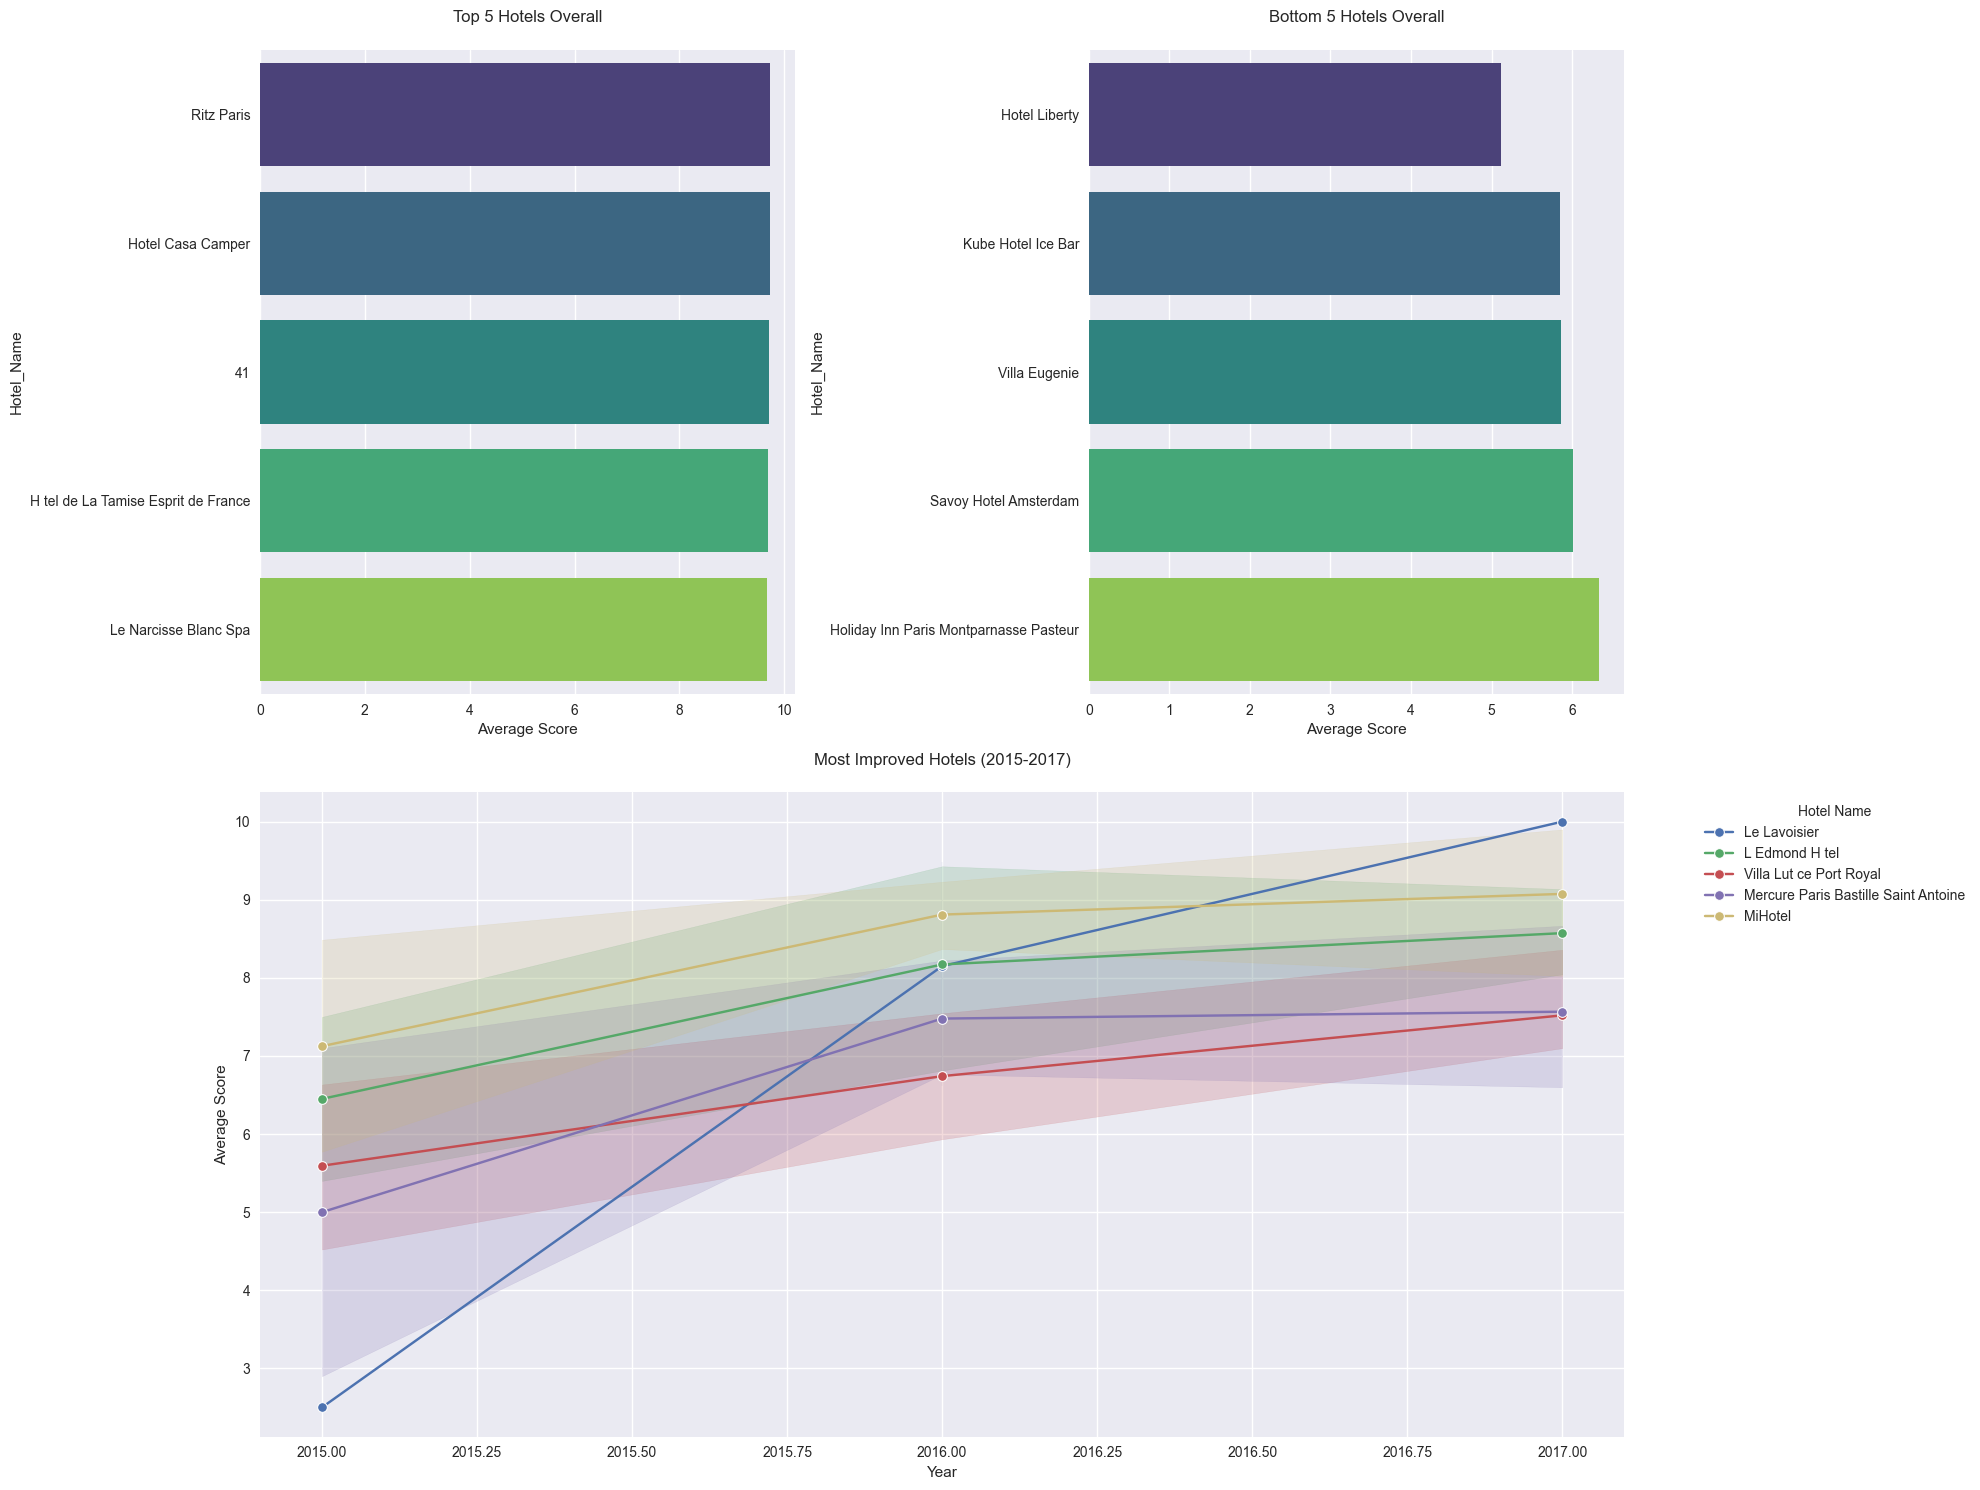

In [165]:
# Create the dashboard
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 15))

# 1. Top Hotels Plot
ax1 = plt.subplot(2, 2, 1)
top_hotels = get_top_hotels(df)
sns.barplot(data=top_hotels, x='Average_Score', y='Hotel_Name', 
            hue='Hotel_Name', legend=False, palette='viridis', ax=ax1)
ax1.set_title('Top 5 Hotels Overall', fontsize=12, pad=20)
ax1.set_xlabel('Average Score')

# 2. Bottom Hotels Plot
ax2 = plt.subplot(2, 2, 2)
bottom_hotels = get_bottom_hotels(df)
sns.barplot(data=bottom_hotels, x='Average_Score', y='Hotel_Name', 
            hue='Hotel_Name', legend=False, palette='viridis', ax=ax2)
ax2.set_title('Bottom 5 Hotels Overall', fontsize=12, pad=20)
ax2.set_xlabel('Average Score')

# 3. Most Improved Hotels Plot
ax3 = plt.subplot(2, 1, 2)
improved_hotels = get_most_improved_hotels(df)
yearly_data = df[df['Hotel_Name'].isin(improved_hotels['Hotel_Name'])]
sns.lineplot(data=yearly_data, x='Year', y='Reviewer_Score', 
             hue='Hotel_Name', marker='o', ax=ax3)
ax3.set_title('Most Improved Hotels (2015-2017)', fontsize=12, pad=20)
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Score')
ax3.legend(title='Hotel Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [171]:
# Print detailed information
print("\nTop 5 Hotels Details:")
top_hotels[['Hotel_Name', 'Average_Score']]


Top 5 Hotels Details:


,Hotel_Name,Average_Score
1202,Ritz Paris,9.725000
598,Hotel Casa Camper,9.718937
0,41,9.711650
472,H tel de La Tamise Esprit de France,9.688525
895,Le Narcisse Blanc Spa,9.671930


In [172]:

print("\nBottom 5 Hotels Details:")
bottom_hotels[['Hotel_Name', 'Average_Score']]



Bottom 5 Hotels Details:


,Hotel_Name,Average_Score
678,Hotel Liberty,5.121538
852,Kube Hotel Ice Bar,5.852632
1455,Villa Eugenie,5.864516
1233,Savoy Hotel Amsterdam,6.009465
546,Holiday Inn Paris Montparnasse Pasteur,6.329730


In [173]:

print("\nMost Improved Hotels Details:")
improved_hotels[['Hotel_Name', 'Score_2015', 'Score_2016', 'Score_2017', 'Improvement']]


Most Improved Hotels Details:


,Hotel_Name,Score_2015,Score_2016,Score_2017,Improvement
816,Le Lavoisier,2.500000,8.150000,10.000000,7.500000
904,Mercure Paris Bastille Saint Antoine,5.000000,7.478571,7.566667,2.566667
791,L Edmond H tel,6.450000,8.171429,8.572727,2.122727
927,MiHotel,7.125000,8.810000,9.075000,1.950000
1322,Villa Lut ce Port Royal,5.594444,6.741667,7.520000,1.925556
